In [7]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

 Définition des données d'entraînement avec plusieurs points


In [8]:
x_train = np.array([
    [1, 1], [1, 2], [2, 1], [3, 3], [3, 4], [4, 4], [8, 8], [9, 8],
    [10, 10], [12, 12], [6, 5], [7, 7], [3, 6], [5, 5], [2, 3],
    [8, 9], [11, 11], [13, 14], [15, 15], [14, 13], [6, 7], [4, 2],
    [5, 3], [1, 5], [2, 6], [3, 7], [9, 12], [8, 6], [10, 14]
])


# ***Représentation initiale des données***

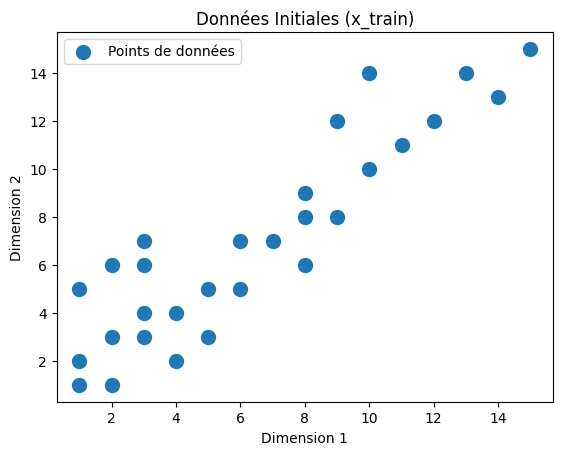

In [9]:
plt.scatter(x_train[:, 0], x_train[:, 1], s=100, label="Points de données")
plt.title("Données Initiales (x_train)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


# ***Créer le modèle K-means avec 3 clusters***

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)

# ***Apprentissage (Clustering)***

In [11]:
kmeans.fit(x_train)

KMeans(n_clusters=3, random_state=42)

# ***Affichage des étiquettes attribuées à chaque point***

In [12]:
print("Labels attribués : ", kmeans.labels_)
print("Centres des clusters :\n", kmeans.cluster_centers_)



Labels attribués :  [2 2 2 2 2 2 0 0 1 1 0 0 2 0 2 0 1 1 1 1 0 2 2 2 2 0 1 0 1]
Centres des clusters :
 [[ 6.66666667  6.88888889]
 [11.75       12.625     ]
 [ 2.58333333  3.33333333]]


# ***Représenter les données avec les clusters identifiés***

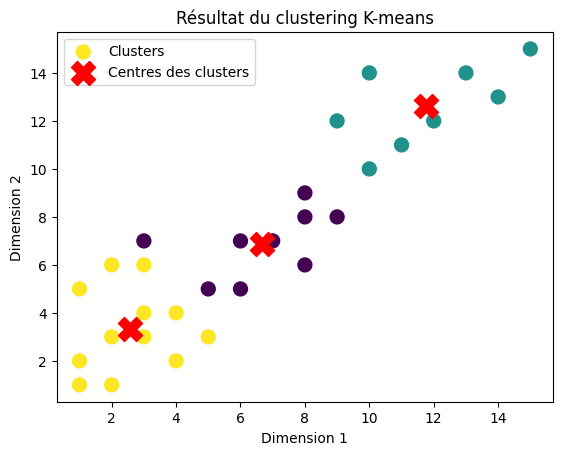

In [13]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmeans.labels_, s=100, cmap='viridis', label="Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label="Centres des clusters", marker="X")
plt.title("Résultat du clustering K-means")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

# ***Méthode du coude pour déterminer le nombre optimal de clusters***


In [14]:
distortions = []
K = range(1, 11)  # Tester de 1 à 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)

# ***Plot the Elbow Curve***

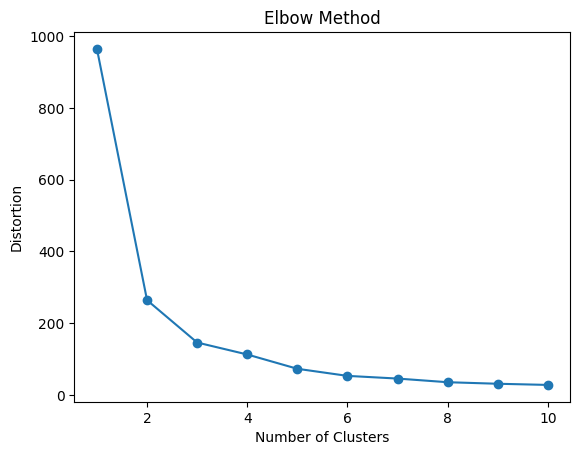

In [15]:

plt.figure()
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()